# Importing modules for scraping data

In [152]:
import requests
from bs4 import BeautifulSoup

# Putting in the url

In [153]:
data = requests.get('https://fbref.com/en/players/507c7bdf/Bruno-Fernandes')
soup = BeautifulSoup(data.text, 'html.parser')

# Scraping the scouting report table as lists

In [154]:
table = soup.find('table', {'id': 'scout_summary_AM'})
tbody = table.find('tbody')

stat_names = []
p90_stats = []

for tr in tbody.find_all('tr'):
    stat_names.append(tr.find_all('th')[0].text.strip())
    p90_stats.append(tr.find_all('td')[0].text.strip())
    
print(stat_names)
print(p90_stats)

['Non-Penalty Goals', 'npxG', 'Shots Total', 'Assists', 'xA', 'npxG+xA', 'Shot-Creating Actions', '', 'Passes Attempted', 'Pass Completion %', 'Progressive Passes', 'Progressive Carries', 'Dribbles Completed', 'Touches (Att Pen)', 'Progressive Passes Rec', '', 'Pressures', 'Tackles', 'Interceptions', 'Blocks', 'Clearances', 'Aerials won']
['0.34', '0.26', '3.19', '0.34', '0.36', '0.62', '4.67', '', '62.97', '74.1%', '6.20', '6.24', '0.73', '4.04', '8.34', '', '21.25', '1.47', '0.63', '1.07', '0.88', '0.48']


# Removing the empty strings inside the lists

In [155]:
p90_stats = list(filter(None, p90_stats))
stat_names = list(filter(None, stat_names))

# Removing the % sign from the passes completed numbers and making it float as it still remains string sometimes

In [156]:
p90_stats = [float(i.strip('%')) for i in p90_stats]
print(p90_stats)

[0.34, 0.26, 3.19, 0.34, 0.36, 0.62, 4.67, 62.97, 74.1, 6.2, 6.24, 0.73, 4.04, 8.34, 21.25, 1.47, 0.63, 1.07, 0.88, 0.48]


# Putting in the lower and the higher most values for the radar chart (read footnotes)

In [157]:
low = [0.00, 0.03, 0.42, 0.00, 0.04, 0.10, 1.19, 20.31, 55.4, 0.85, 1.87, 0.25, 0.54, 1.95, 7.79, 0.35, 0.21, 0.34, 0.00, 0.00]
high = [0.75, 0.65, 5.49, 0.52, 0.48, 0.91, 7.31, 72.52, 88.0, 9.59, 15.52, 5.70, 9.40, 12.01, 28.40, 2.89, 1.90, 2.59, 1.59, 3.40]

# Giving the calculated values to the right variables

In [158]:
params = stat_names
bruno_values = p90_stats

# Importing modules for plotting

In [159]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

# Making a radar object with the right parameters

In [160]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*20,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

# Importing some fonts (not mandatory)

In [161]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

# Plotting the radar graph

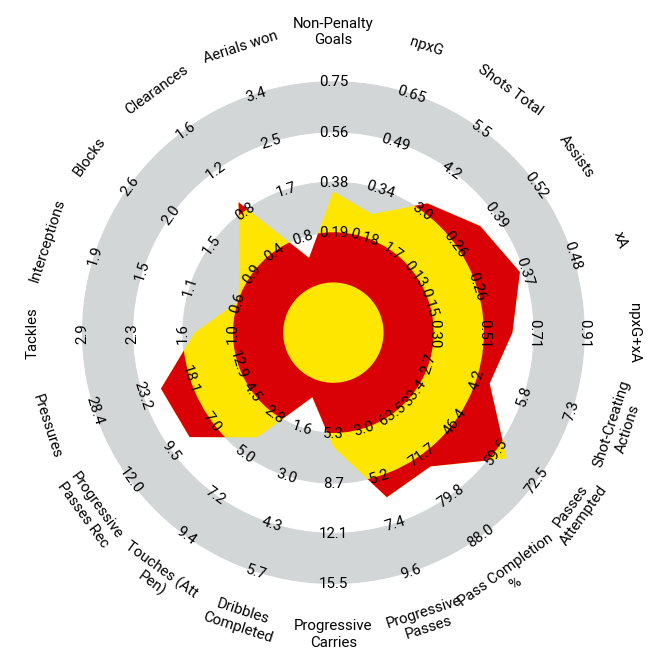

In [162]:
fig, axs = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs, facecolor='#d2d6d6', edgecolor='#d2d6d6')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=axs,
                                kwargs_radar={'facecolor': '#FFE600'},
                                kwargs_rings={'facecolor': '#DA0106'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=axs, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

# Making a function for inserting titles and endnotes

In [163]:
def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

# Plotting the radar chart with the titles and endnotes

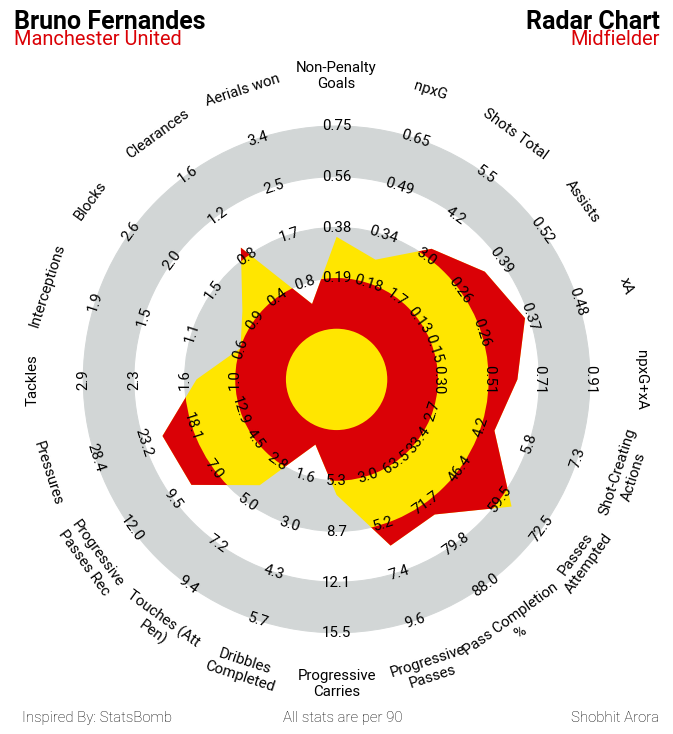

In [164]:
# creating the figure using the function defined above:
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=10)

# plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#d2d6d6', edgecolor='#d2d6d6')
radar_output = radar.draw_radar(bruno_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#FFE600'},
                                kwargs_rings={'facecolor': '#DA0106'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_regular.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_regular.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.25, 0.5, 'Inspired By: StatsBomb', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
endnote_text = axs['endnote'].text(0.6, 0.5, 'All stats are per 90', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
endnote_text = axs['endnote'].text(0.99, 0.5, 'Shobhit Arora', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='left', va='center', color='#DA0106')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='right', va='center')
title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='right', va='center', color='#DA0106')

# References and Footnotes

### This radar chart idea has been taken from the python library mplsoccer 
### https://mplsoccer.readthedocs.io/en/latest/gallery/radar/plot_radar.html

### The data has been scraped from fbref.com via statsbomb
### https://fbref.com/en/players/507c7bdf/Bruno-Fernandes

### To calculate the low and high values of the radar chart, the details can be read here: 
### https://statsbomb.com/2016/04/understand-football-radars-for-mugs-and-muggles/